Analisi spesa grafici : https://esploradati.istat.it/databrowser/#/it/dw/categories/IT1,DATAWAREHOUSE,1.0/UP_ACC_HEALTH/IT1,91_963_DF_DCCN_SHA_1,1.0 

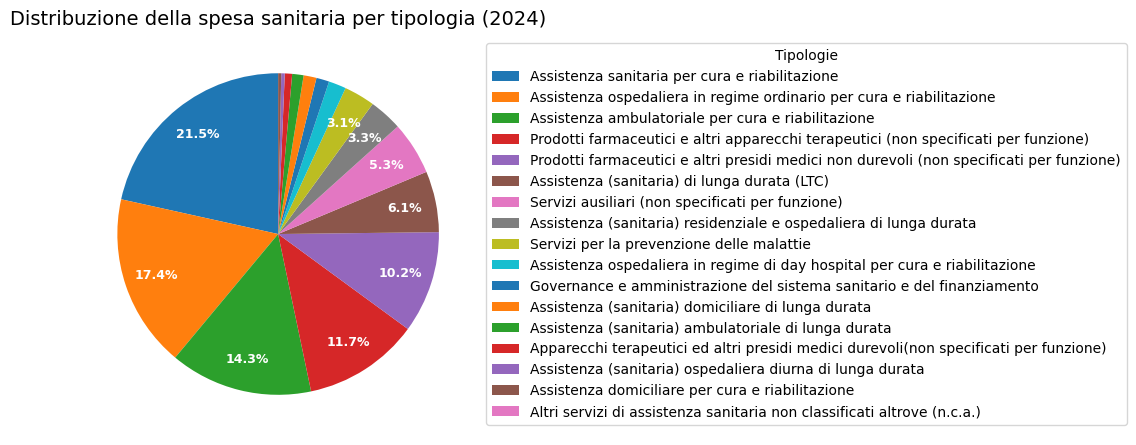

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Spesa_funzione.csv"
df = pd.read_csv(file_path, sep=",", engine="python", on_bad_lines="skip")

# Pulizia colonne
df_clean = df[["Frequenza", "Tipo di funzioni di assistenza sanitaria"]].copy()
df_clean["Tipo di funzioni di assistenza sanitaria"] = pd.to_numeric(
    df_clean["Tipo di funzioni di assistenza sanitaria"], errors="coerce"
)
df_clean = df_clean.dropna()

# Somme per tipologia
spesa_funzione = (
    df_clean.groupby("Frequenza")["Tipo di funzioni di assistenza sanitaria"]
    .sum()
    .sort_values(ascending=False)
)

def autopct_custom(pct):
    return f"{pct:.1f}%" if pct >= 2 else ""

# Grafico a torta con legenda esterna
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    spesa_funzione,
    autopct=autopct_custom,
    startangle=90,
    pctdistance=0.8
)

# Legenda esterna
ax.legend(
    wedges,
    spesa_funzione.index,
    title="Tipologie",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=9, weight="bold", color="white")
plt.title("Distribuzione della spesa sanitaria per tipologia (2024)", fontsize=14)
plt.tight_layout()
plt.show()


<p> per visualizzarlo meglio con le percentuali e in modo crescente 

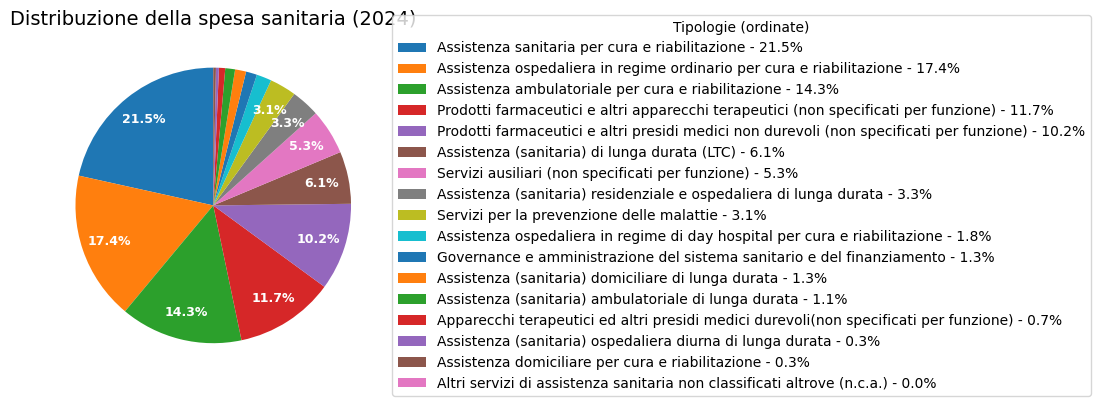

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Spesa_funzione.csv"
df = pd.read_csv(file_path, sep=",", engine="python", on_bad_lines="skip")

df_clean = df[["Frequenza", "Tipo di funzioni di assistenza sanitaria"]].copy()
df_clean["Tipo di funzioni di assistenza sanitaria"] = pd.to_numeric(
    df_clean["Tipo di funzioni di assistenza sanitaria"], errors="coerce"
)
df_clean = df_clean.dropna()

spesa_funzione = (
    df_clean.groupby("Frequenza")["Tipo di funzioni di assistenza sanitaria"]
    .sum()
    .sort_values(ascending=False)
)

def autopct_custom(pct):
    return f"{pct:.1f}%" if pct >= 2 else ""

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    spesa_funzione,
    autopct=autopct_custom,
    startangle=90,
    pctdistance=0.8
)

# --- Legenda ordinata ---
total = spesa_funzione.sum()
percentuali = (spesa_funzione / total * 100).round(1)

# Creiamo un DataFrame con valori + percentuali
legend_data = pd.DataFrame({
    "Categoria": spesa_funzione.index,
    "Valore": spesa_funzione.values,
    "Percentuale": percentuali.values
}).sort_values("Percentuale", ascending=False)


labels = [f"{row.Categoria} - {row.Percentuale}%" for row in legend_data.itertuples()]

ax.legend(
    wedges,
    labels,
    title="Tipologie (ordinate)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=9, weight="bold", color="white")
plt.title("Distribuzione della spesa sanitaria (2024)", fontsize=14)
plt.tight_layout()
plt.show()


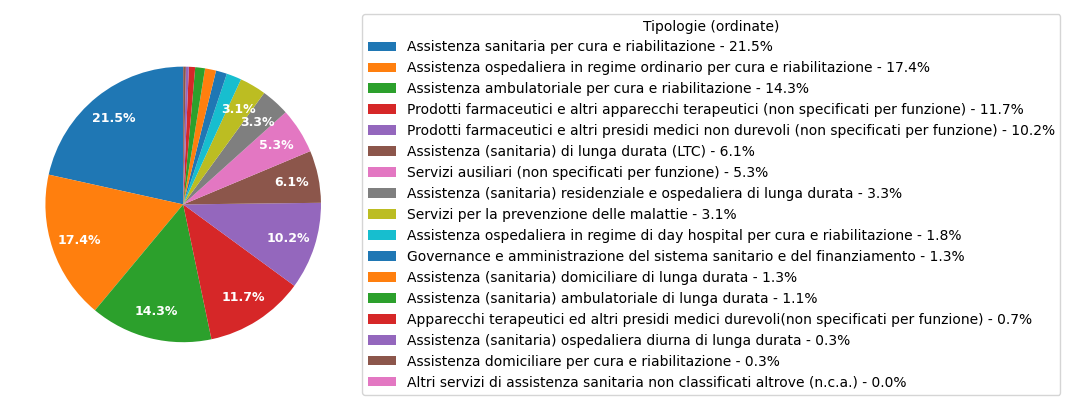

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "Spesa_funzione.csv"
df = pd.read_csv(file_path, sep=",", engine="python", on_bad_lines="skip")

df_clean = df[["Frequenza", "Tipo di funzioni di assistenza sanitaria"]].copy()
df_clean["Tipo di funzioni di assistenza sanitaria"] = pd.to_numeric(
    df_clean["Tipo di funzioni di assistenza sanitaria"], errors="coerce"
)
df_clean = df_clean.dropna()

spesa_funzione = (
    df_clean.groupby("Frequenza")["Tipo di funzioni di assistenza sanitaria"]
    .sum()
    .sort_values(ascending=False)
)

def autopct_custom(pct):
    return f"{pct:.1f}%" if pct >= 2 else ""

fig, ax = plt.subplots(figsize=(10, 8), facecolor="none")
wedges, texts, autotexts = ax.pie(
    spesa_funzione,
    autopct=autopct_custom,
    startangle=90,
    pctdistance=0.8
)

# --- Legenda ordinata ---
total = spesa_funzione.sum()
percentuali = (spesa_funzione / total * 100).round(1)

legend_data = pd.DataFrame({
    "Categoria": spesa_funzione.index,
    "Valore": spesa_funzione.values,
    "Percentuale": percentuali.values
}).sort_values("Percentuale", ascending=False)

labels = [f"{row.Categoria} - {row.Percentuale}%" for row in legend_data.itertuples()]

ax.legend(
    wedges,
    labels,
    title="Tipologie (ordinate)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=9, weight="bold", color="white")
plt.title("Distribuzione della spesa sanitaria (2024)", fontsize=12, color="white")
plt.tight_layout()

# --- Salva come PNG con sfondo trasparente ---
plt.savefig("spesa_sanitaria_funzioni.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()
